# Dayananda B N, 201EC219

### Department of Electronics & Communication Engineering
#### National Institute of Technology Karnataka 
#### Surathkal, Mangalore-575025(Karnataka), India
#### EC460- Neural Networks and Deep Learning
#### Assignment 1(b): Linear Regression

## Assignment 1(b): Linear Regression

### Q.5 Write an python code of Perceptron model from scratch(without deep Learning Library) for predicting the Air Quality Index (AQI) (Dataset: https://github.com/Anindya-Das02/Comparison-of-ML-models-for-predicting-AQI). Choose random weights and bias of the neuron and learning rate=0.001 with Stochastic Gradient Descent algorithm for the loss Mean Square Error function (b) Plot loss curve for 100 epochs (c) Predict result on test data and compare with target (d) Calculate MAE and RMSE of the model. (e) Compare results between Scikit Library and Perceptron model from scratch (f) repeat part (a) to (e) for Mean Bias Error loss function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

In [2]:
data = pd.read_csv("RAW_DATASET_state_weather_aqi_data.csv")
data

state               city  \
0     Andhra_Pradesh          Amaravati   
1     Andhra_Pradesh  Rajamahendravaram   
2     Andhra_Pradesh           Tirupati   
3     Andhra_Pradesh      Visakhapatnam   
4     Andhra_Pradesh          Amaravati   
...              ...                ...   
1568     West_Bengal            Kolkata   
1569     West_Bengal            Kolkata   
1570     West_Bengal            Kolkata   
1571     West_Bengal            Kolkata   
1572     West_Bengal           Siliguri   

                                             station        date      time  \
0                     Secretariat, Amaravati - APPCB  03-01-2020  10:00:00   
1     Anand Kala Kshetram, Rajamahendravaram - APPCB  03-01-2020  10:00:00   
2                         Tirumala, Tirupati - APPCB  03-01-2020  10:00:00   
3             GVM Corporation, Visakhapatnam - APPCB  03-01-2020  10:00:00   
4                     Secretariat, Amaravati - APPCB  05-01-2020  06:00:00   
...                                              ...         ...       ...   
1568                       Jadavpur, Kolkata - WBPCB  07-01-2020  03:00:00   
1569    Rabindra Bharati University, Kolkata - WBPCB  07-01-2020  03:00:00   
1570               Rabindra Sarobar, Kolkata - WBPCB  07-01-2020  03:00:00   
1571                       Victoria, Kolkata - WBPCB  07-01-2020  03:00:00   
1572              Ward-32 Bapupara, Siliguri - WBPCB  07-01-2020  03:00:00   

      PM2.5   PM10   NO2   NH3   SO2    CO  OZONE    AQI Predominant_Parameter  
0      68.0   64.0  17.0   4.0  28.0  31.0   40.0   68.0                 PM2.5  
1      67.0   70.0  23.0   2.0  13.0  49.0   77.0   77.0                 OZONE  
2      32.0    NaN  26.0   5.0   6.0  19.0   16.0   32.0                 PM2.5  
3      93.0   93.0  31.0   3.0   9.0  57.0   61.0   93.0                  PM10  
4      60.0   55.0  20.0   5.0  18.0  29.0   53.0   60.0                 PM2.5  
...     ...    ...   ...   ...   ...   ...    ...    ...                   ...  
1568  163.0  142.0  57.0   7.0  10.0  39.0    8.0  163.0                 PM2.5  
1569  279.0  215.0  78.0  11.0  23.0  31.0   53.0  279.0                 PM2.5  
1570  162.0  136.0  43.0   4.0  16.0  34.0   44.0  162.0                 PM2.5  
1571  213.0  152.0  55.0   5.0  11.0  95.0   64.0  213.0                 PM2.5  
1572  199.0  166.0  60.0   7.0   6.0  29.0   36.0  199.0                 PM2.5  

[1573 rows x 14 columns]

/tmp/ipykernel_24719/2475583980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

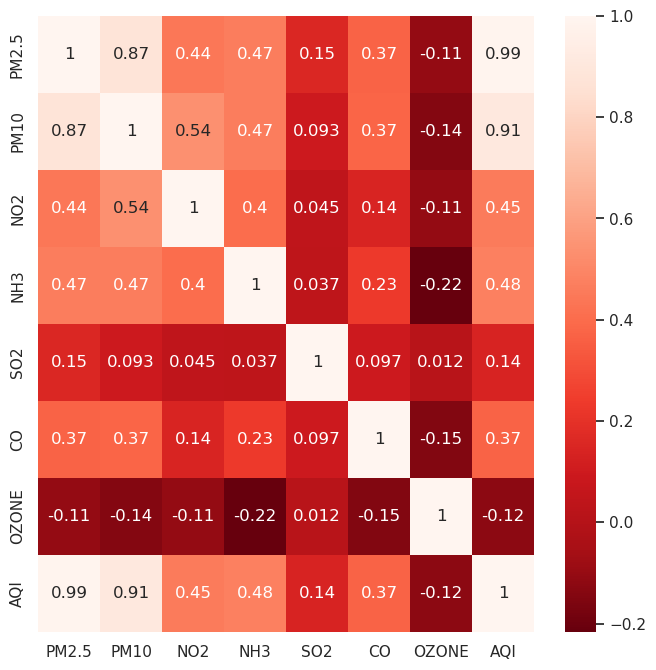

In [3]:
cor = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds_r)

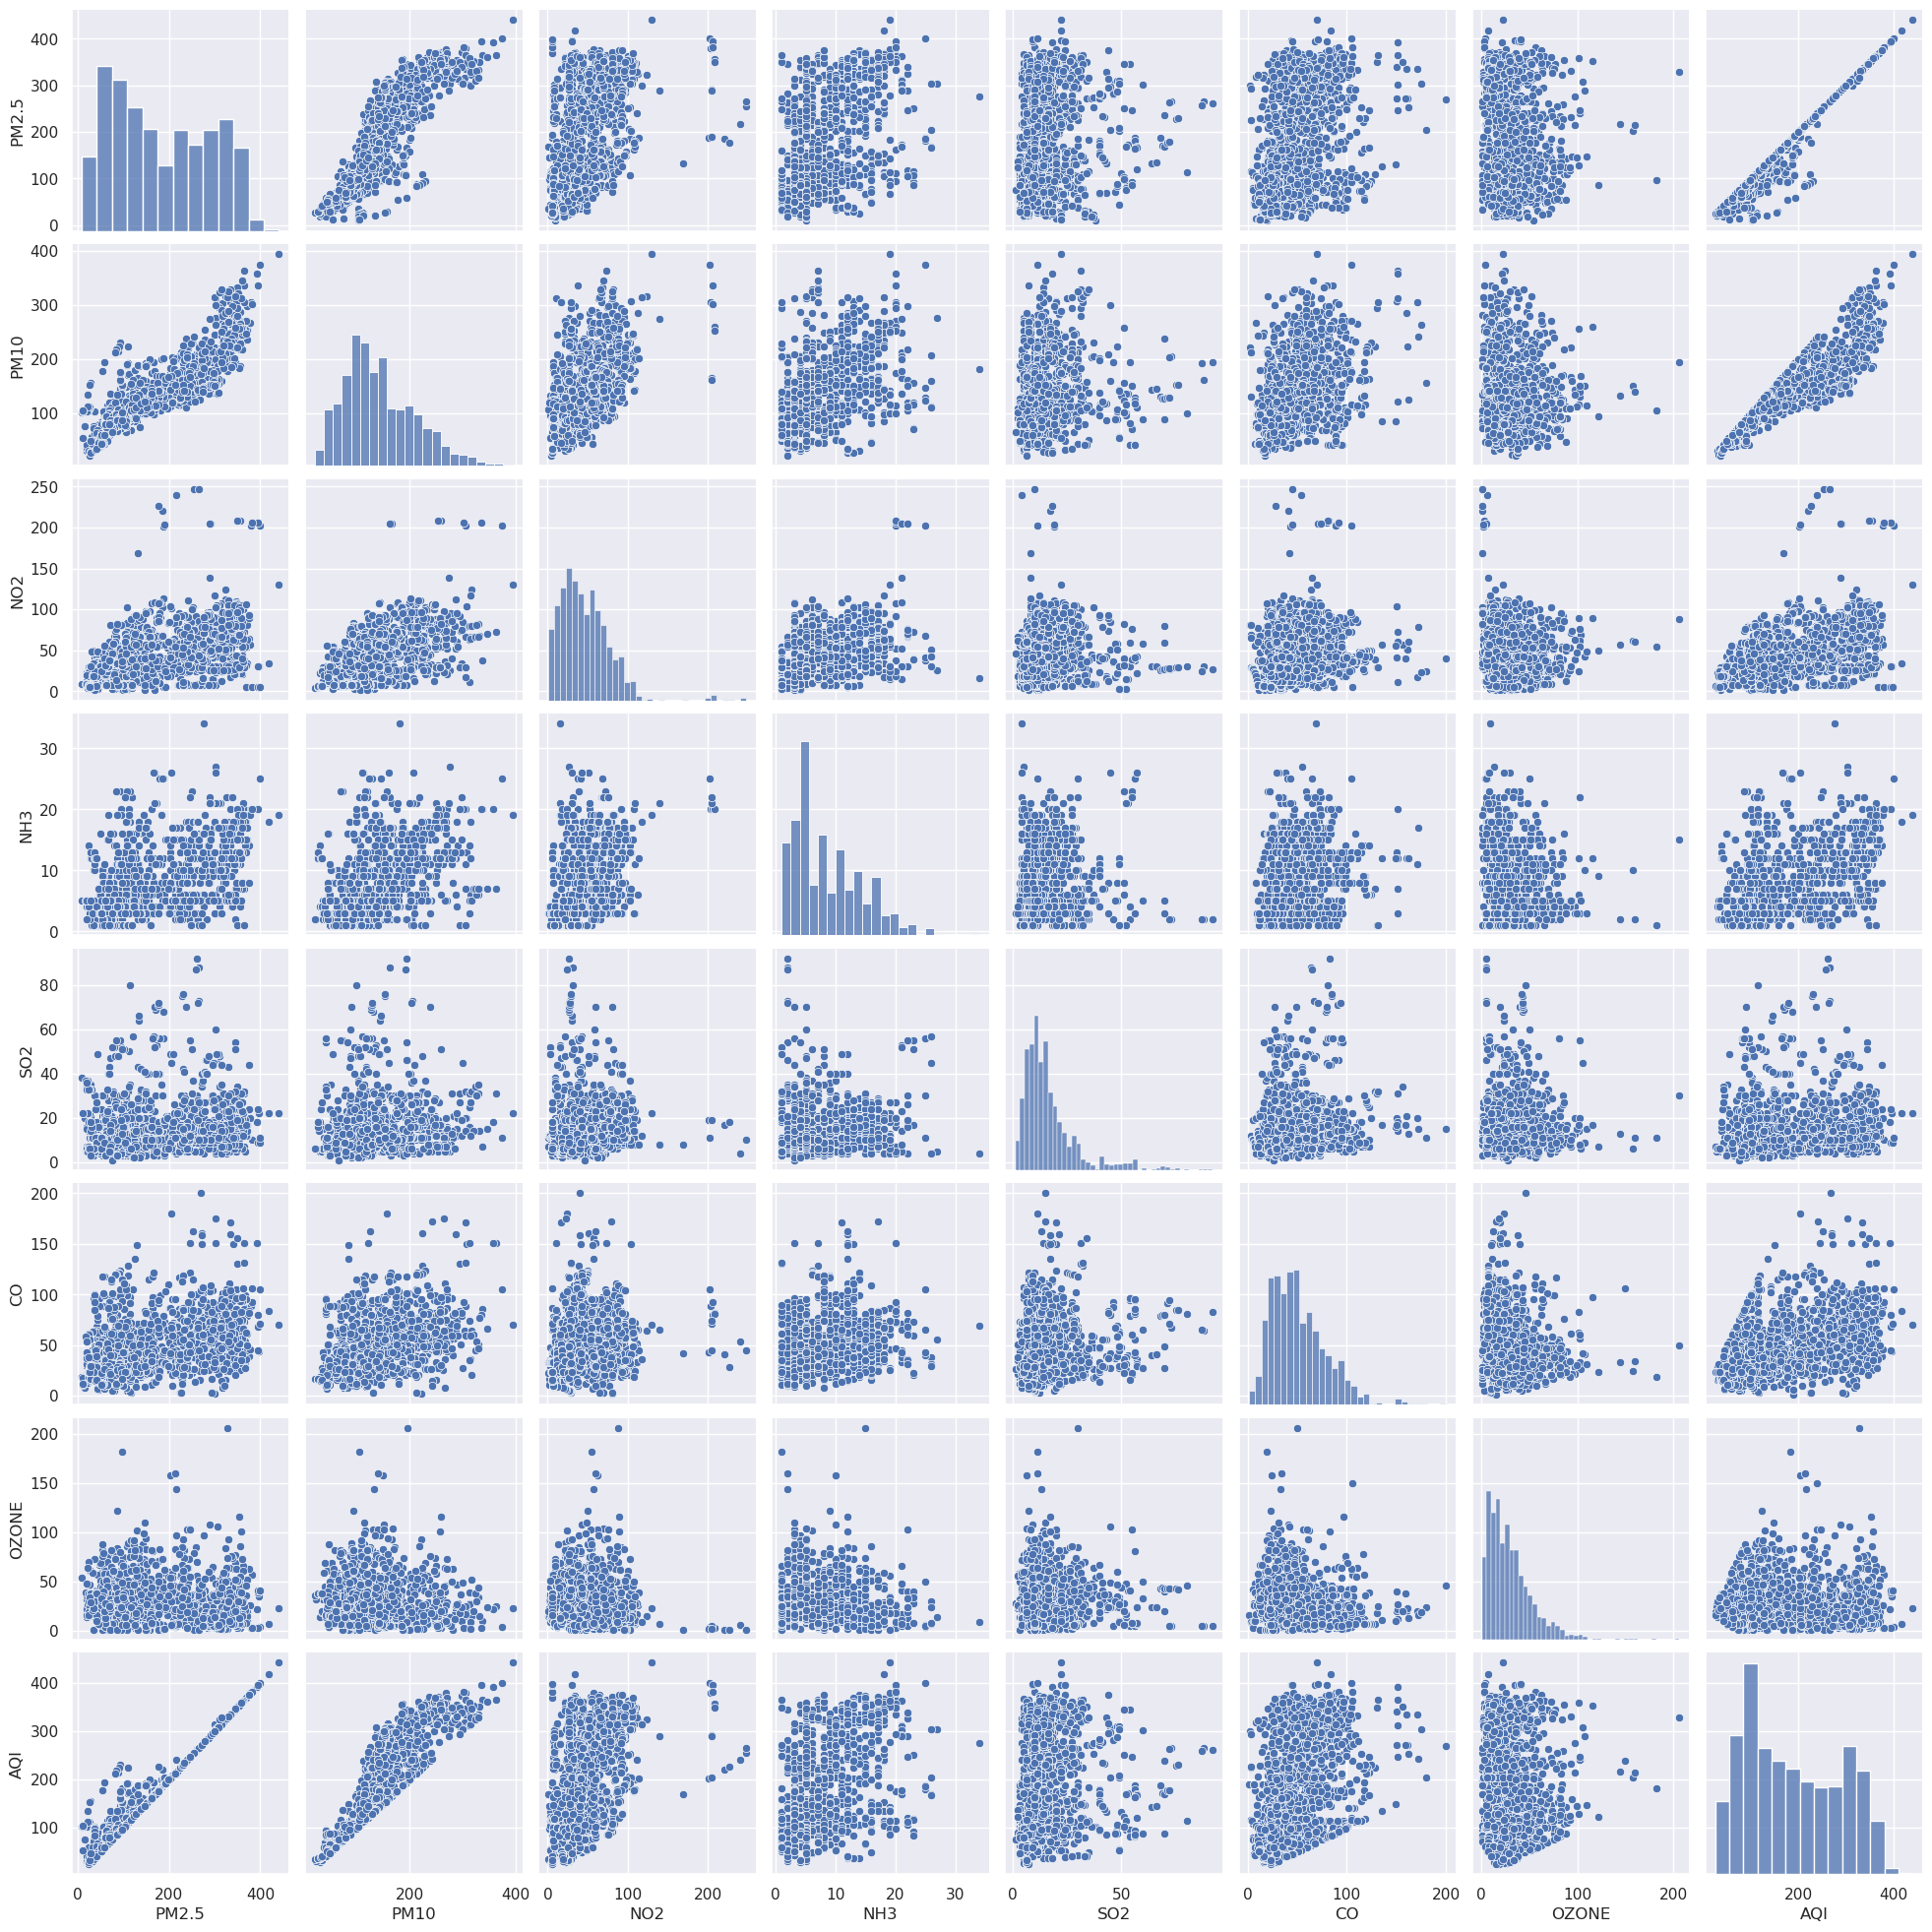

In [4]:
sns.pairplot(data)

In [31]:
x_data = data.iloc[:,5:12]
x_data

PM2.5   PM10   NO2   NH3   SO2    CO  OZONE
0      68.0   64.0  17.0   4.0  28.0  31.0   40.0
1      67.0   70.0  23.0   2.0  13.0  49.0   77.0
2      32.0    NaN  26.0   5.0   6.0  19.0   16.0
3      93.0   93.0  31.0   3.0   9.0  57.0   61.0
4      60.0   55.0  20.0   5.0  18.0  29.0   53.0
...     ...    ...   ...   ...   ...   ...    ...
1568  163.0  142.0  57.0   7.0  10.0  39.0    8.0
1569  279.0  215.0  78.0  11.0  23.0  31.0   53.0
1570  162.0  136.0  43.0   4.0  16.0  34.0   44.0
1571  213.0  152.0  55.0   5.0  11.0  95.0   64.0
1572  199.0  166.0  60.0   7.0   6.0  29.0   36.0

[1573 rows x 7 columns]

In [22]:
pd.isnull(x_data)

PM2.5   PM10    NO2    NH3    SO2     CO  OZONE
0     False  False  False  False  False  False  False
1     False  False  False  False  False  False  False
2     False   True  False  False  False  False  False
3     False  False  False  False  False  False  False
4     False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...
1568  False  False  False  False  False  False  False
1569  False  False  False  False  False  False  False
1570  False  False  False  False  False  False  False
1571  False  False  False  False  False  False  False
1572  False  False  False  False  False  False  False

[1573 rows x 7 columns]

In [35]:
x_data['PM2.5'].fillna(x_data['PM2.5'].mean(), inplace=True)
x_data['PM10'].fillna(x_data['PM10'].mean(), inplace=True)
x_data['NO2'].fillna(x_data['NO2'].mean(), inplace=True)
x_data['NH3'].fillna(x_data['NH3'].mean(), inplace=True)
x_data['SO2'].fillna(x_data['SO2'].mean(), inplace=True)
x_data['CO'].fillna(x_data['CO'].mean(), inplace=True)
x_data['OZONE'].fillna(x_data['OZONE'].mean(), inplace=True)

In [36]:
x_data

PM2.5        PM10   NO2   NH3   SO2    CO  OZONE
0      68.0   64.000000  17.0   4.0  28.0  31.0   40.0
1      67.0   70.000000  23.0   2.0  13.0  49.0   77.0
2      32.0  141.674267  26.0   5.0   6.0  19.0   16.0
3      93.0   93.000000  31.0   3.0   9.0  57.0   61.0
4      60.0   55.000000  20.0   5.0  18.0  29.0   53.0
...     ...         ...   ...   ...   ...   ...    ...
1568  163.0  142.000000  57.0   7.0  10.0  39.0    8.0
1569  279.0  215.000000  78.0  11.0  23.0  31.0   53.0
1570  162.0  136.000000  43.0   4.0  16.0  34.0   44.0
1571  213.0  152.000000  55.0   5.0  11.0  95.0   64.0
1572  199.0  166.000000  60.0   7.0   6.0  29.0   36.0

[1573 rows x 7 columns]

In [9]:
y_data = data.iloc[:,12:13]
y_data

AQI
0      68.0
1      77.0
2      32.0
3      93.0
4      60.0
...     ...
1568  163.0
1569  279.0
1570  162.0
1571  213.0
1572  199.0

[1573 rows x 1 columns]

In [43]:
y_data['AQI'].fillna(y_data['AQI'].mean(), inplace=True)

In [44]:
y_data

AQI
0      68.0
1      77.0
2      32.0
3      93.0
4      60.0
...     ...
1568  163.0
1569  279.0
1570  162.0
1571  213.0
1572  199.0

[1573 rows x 1 columns]

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x_data)
y_norm = sc.fit_transform(y_data)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=42)

In [47]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1258, 7) (1258, 1) (315, 7) (315, 1)


### Stochastic Gradient Descent algorithm (from LIbraries)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [49]:
model.coef_

array([[ 0.795537  ,  0.15689514,  0.01535535, -0.0049735 ,  0.00592727,
         0.03872424, -0.01199915]])

In [50]:
model.intercept_

array([0.00054077])

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred

array([[ 3.30217548e-01],
       [-6.33435565e-02],
       [ 9.24889444e-01],
       [ 2.92980717e-01],
       [-7.86394408e-01],
       [ 3.60894451e-01],
       [ 1.03509672e+00],
       [ 1.52755418e+00],
       [-1.39101891e-01],
       [ 1.42989899e+00],
       [-1.26855060e+00],
       [-2.81971725e-03],
       [-2.79786255e-01],
       [-1.57274533e+00],
       [-4.36702920e-01],
       [-7.32230505e-01],
       [ 4.87830685e-02],
       [-4.01570741e-01],
       [-7.67557502e-01],
       [-1.59946809e+00],
       [-3.41806765e-01],
       [ 3.78197730e-01],
       [ 5.56090003e-01],
       [ 4.09412169e-01],
       [ 1.21649977e+00],
       [-6.53987738e-01],
       [-7.52261642e-01],
       [ 1.03229282e+00],
       [-1.44814680e+00],
       [-5.95859007e-03],
       [ 1.16043171e+00],
       [-8.09364662e-01],
       [-1.01577766e+00],
       [-1.35843475e+00],
       [ 1.55176285e-01],
       [-1.43321529e-02],
       [-1.10301173e+00],
       [-8.73661267e-01],
       [ 1.0

### Stochastic Gradient Descent algorithm (from Scratch code)

### (i) Mean Square Error

In [53]:
# cost function implimentation
def cal_cost(theta,x,y):
    y_pred = np.dot(x,theta)
    J = (1/len(y))*np.sum((y_pred - y)**2)
    
    return J

In [54]:
def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,8))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history

In [55]:
# Calling Stochastic gradient descent 
import time
lr  = 0.001
epochs = 10000
theta = np.random.randn(8,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print('{:<10}{:.3}'.format('Theta3',theta[3][0]))
print('{:<10}{:.3}'.format('Theta4',theta[4][0]))
print('{:<10}{:.3}'.format('Theta5',theta[5][0]))
print('{:<10}{:.3}'.format('Theta6',theta[6][0]))
print('{:<10}{:.3}'.format('Theta7',theta[7][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]
print(y_true)

Initial values of weights
[[-0.05356449]
 [ 0.11024874]
 [ 1.19892191]
 [ 1.09916939]
 [-1.01265162]
 [-0.97498955]
 [ 0.40083606]
 [ 1.68239843]]
Processing Time of SGD Algorithm
441.46773409843445
[[ 7.49724923e-04]
 [ 7.84968529e-01]
 [ 1.67315503e-01]
 [ 1.50052811e-02]
 [-5.18741638e-03]
 [ 6.61604073e-03]
 [ 3.89610182e-02]
 [-1.27444811e-02]]
Optimal value of weights
Theta0    0.00075
Theta1    0.785
Theta2    0.167
Theta3    0.015
Theta4    -0.00519
Theta5    0.00662
Theta6    0.039
Theta7    -0.0127
Minimum value of cost function
Cost/MSE  1.37e+02
[[ 3.28345335e-01  3.51932931e-01]
 [-5.89671938e-02 -2.45681227e-01]
 [ 9.14198567e-01  1.09135384e+00]
 [ 2.85193359e-01  4.43094412e-01]
 [-7.78293509e-01 -7.42004849e-01]
 [ 3.61308250e-01  3.41803877e-01]
 [ 1.02384942e+00  1.22303153e+00]
 [ 1.52730572e+00  1.59780651e+00]
 [-1.42586521e-01 -2.15294066e-01]
 [ 1.41256398e+00  1.72948421e+00]
 [-1.26802629e+00 -1.23832847e+00]
 [-2.20392795e-03 -1.14003531e-01]
 [-2.82128942e-0

#### (b) Plot loss curve for 10000 epochs

Text(0, 0.5, 'Loss')

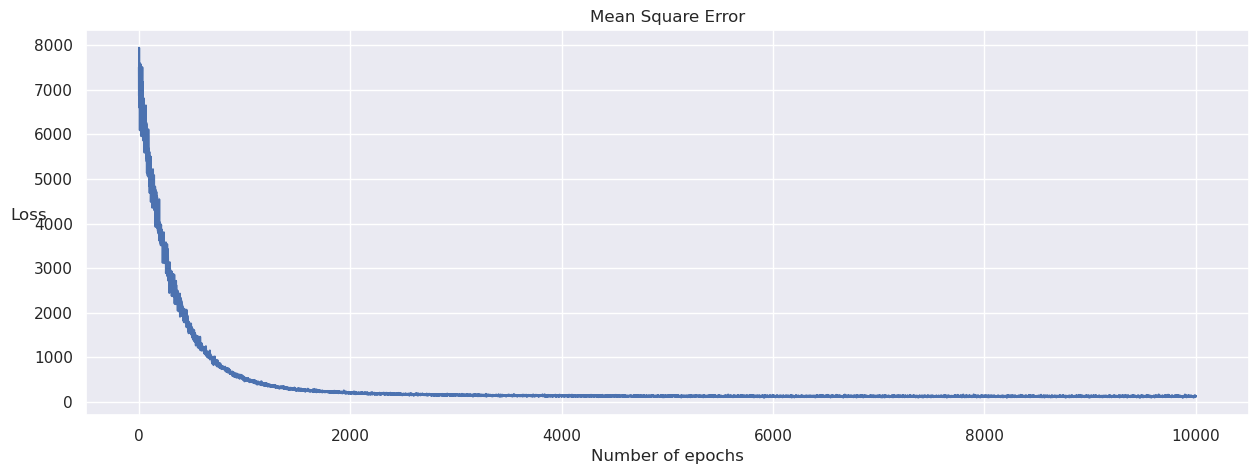

In [56]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Mean Square Error')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [57]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.08905321393828763
RMSE is  0.21950423730817167


### Mean Bias Error

In [58]:
# cost function implimentation
def cal_cost(theta,x,y,epsilon = 0.1):
    y_pred = np.dot(x,theta)
    J = np.sum((y_pred,y))/y.size
    
    return J

def stochastic_gradient_descent(x,y,theta,lr,epochs):
    m = len(y_train)
    theta_history = np.zeros((epochs,8))
    cost_history = np.zeros((epochs))
    for i in range(epochs):
        cost_per_iteration = 0.0
        for j in range(m):

            l = int(np.random.randint(m))
            x_in = x_train[l].reshape(1,-1)
            x_inner = np.c_[np.ones((len(x_in),1)),x_in]
            y_inner = y_train[l].reshape(1,1)
            # Forward Propagation
            y_pred = np.dot(x_inner,theta)
            # computing the cost value
            cost_per_iteration = cost_per_iteration + cal_cost(theta,x_inner,y_inner)
            # backpropagation
            d_theta = (2/len(y_train))*(x_inner.T.dot((y_pred - y_inner)))
            # weight update
            theta = theta - (lr*d_theta)
        cost_history[i] = cost_per_iteration
    return theta,cost_history,theta_history

# Calling Stochastic gradient descent 
import time
lr  = 0.001
epochs = 10000
theta = np.random.randn(8,1)
print("Initial values of weights")
print(theta)

x_b = np.c_[np.ones((len(x_train),1)),x_train]

# Calling SGD
t20 = time.time()
theta,cost_history,theta_history = stochastic_gradient_descent(x_b,y_train,theta,lr,epochs)
t21 = time.time()
time_SGD = t21 - t20
print("Processing Time of SGD Algorithm")
print(time_SGD)
print(theta)


x_b1 = np.c_[np.ones((len(x_test),1)),x_test]
# Predict value by NN
y_pred = np.dot(x_b1,theta)
print("Optimal value of weights")
print('{:<10}{:.3}'.format('Theta0',theta[0][0]))
print('{:<10}{:.3}'.format('Theta1',theta[1][0]))
print('{:<10}{:.3}'.format('Theta2',theta[2][0]))
print('{:<10}{:.3}'.format('Theta3',theta[3][0]))
print('{:<10}{:.3}'.format('Theta4',theta[4][0]))
print('{:<10}{:.3}'.format('Theta5',theta[5][0]))
print('{:<10}{:.3}'.format('Theta6',theta[6][0]))
print('{:<10}{:.3}'.format('Theta7',theta[7][0]))
print("Minimum value of cost function")
print('{:<10}{:.3}'.format('Cost/MSE',cost_history[-1]))

# print(y_predicted)
y_true = np.c_[y_pred,y_test]
print(y_true)


Initial values of weights
[[-1.52311878]
 [ 0.26174263]
 [ 1.06598241]
 [-0.88141509]
 [-0.39252936]
 [ 0.07305476]
 [-1.21324304]
 [ 0.25915585]]
Processing Time of SGD Algorithm
477.1491312980652
[[ 5.22226224e-04]
 [ 7.85998409e-01]
 [ 1.66622504e-01]
 [ 1.48742815e-02]
 [-5.20962257e-03]
 [ 6.55171522e-03]
 [ 3.88451650e-02]
 [-1.19089022e-02]]
Optimal value of weights
Theta0    0.000522
Theta1    0.786
Theta2    0.167
Theta3    0.0149
Theta4    -0.00521
Theta5    0.00655
Theta6    0.0388
Theta7    -0.0119
Minimum value of cost function
Cost/MSE  -77.9
[[ 3.28789781e-01  3.51932931e-01]
 [-5.98176813e-02 -2.45681227e-01]
 [ 9.15143132e-01  1.09135384e+00]
 [ 2.85270312e-01  4.43094412e-01]
 [-7.79610505e-01 -7.42004849e-01]
 [ 3.61282228e-01  3.41803877e-01]
 [ 1.02485436e+00  1.22303153e+00]
 [ 1.52733704e+00  1.59780651e+00]
 [-1.43300979e-01 -2.15294066e-01]
 [ 1.41379656e+00  1.72948421e+00]
 [-1.26781472e+00 -1.23832847e+00]
 [-2.87557055e-03 -1.14003531e-01]
 [-2.82956992e-01

#### (b) Plot loss curve for 10000 epochs

Text(0, 0.5, 'Loss')

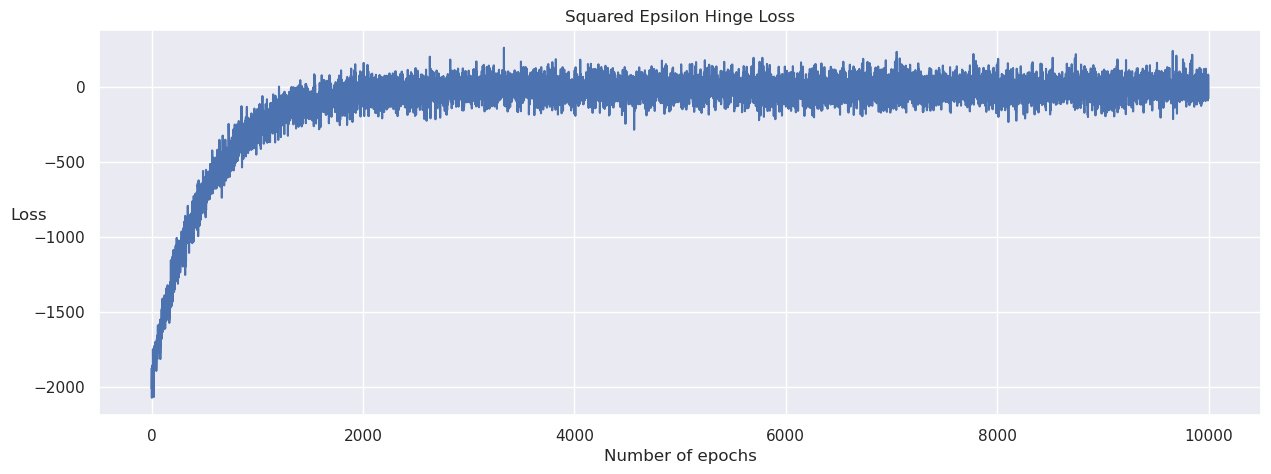

In [59]:
# Plotting the loss function
plt.figure(figsize=(15,5))
plt.plot(range(epochs),cost_history)
plt.title('Squared Epsilon Hinge Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss',rotation = 0)

#### (c) Calculate MAE and RMSE of the model

In [60]:
def rmse(yHAT,y):
    rmse = np.sqrt(np.sum((yHAT-y)**2)/y.size)
    return rmse


def MAE(yHAT,y):
    return np.sum(np.absolute(yHAT-y))/y.size

print("MAE is ",MAE(y_pred,y_true))
print("RMSE is ",rmse(y_pred,y_true))

MAE is  0.08892560603931782
RMSE is  0.21948204620807088
